# Tugas Individu
Rafi Fadhlillah <br>
121450143

## Nomor 1
Buatlah data berupa gambar tungal sebagai input dengan ukuran 28x28 grayscale.

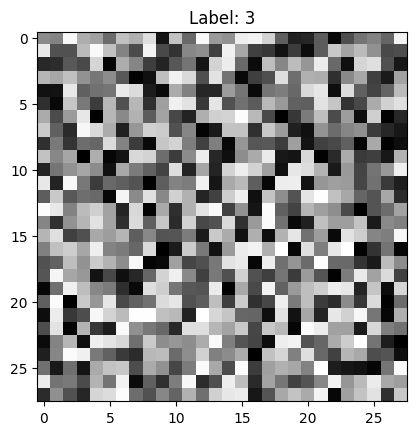

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Buat gambar acak sebagai input (misalnya gambar 28x28 grayscale)
# Atau bisa ganti dengan gambar lain jika ada
input_image = np.random.rand(28, 28, 1).astype('float32')

# Label untuk gambar tersebut (misalnya, label 3)
input_label = np.array([3])

# Perluas dimensi agar sesuai dengan format input Keras (batch size, height, width, channels)
X_train_single = np.expand_dims(input_image, axis=0)

# Visualisasi gambar input
plt.imshow(input_image.squeeze(), cmap='gray')
plt.title(f"Label: {input_label[0]}")
plt.show()


Kemudian buatlah model yang terdiri dari dua convolutional layers dan dua pooling layers. Pada convolutional layer pertama, gunakan 16 filter dengan ukuran kernel 3x3, parameter stride (1, 1), dan padding 'valid'. Kemudian, tambahkan pooling layer pertama dengan ukuran 3x3. Selanjutnya, pada convolutional layer kedua, gunakan 128 filter dengan ukuran kernel 3x3, parameter stride (1, 1), dan padding 'same', diikuti oleh pooling layer kedua dengan ukuran 2x2.

In [2]:
# Bangun model CNN sederhana
model = models.Sequential()

# Convolutional Layer pertama dengan stride dan padding
model.add(layers.Conv2D(16, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(30, 2, 1)))

# Pooling Layer (3x3)
model.add(layers.MaxPooling2D((3, 3)))

# Convolutional Layer kedua
model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))

# Pooling Layer (2x2)
model.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Tampilkan arsitektur model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 0, 16)           │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 9, 0, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 0, 128)           │          18,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 0, 128)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,720 (73.12 KB)

 Trainable params: 18,720 (73.12 KB)

 Non-trainable params: 0 (0.00 B)

Setelah melakukan flatten pada output, tambahkan satu fully connected layer dengan 64 neuron yang menggunakan fungsi aktivasi ReLU. Buat output layer menjadi satu neuron dengan fungsi aktivasi sigmoid. Tampilkan ringkasan model !

In [4]:
# Flatten output untuk fully connected layer
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer dengan 1 unit (untuk klasifikasi 1 kelas) dengan sigmoid
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
# Tampilkan arsitektur model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 0, 16)           │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 9, 0, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 0, 128)           │          18,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 0, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,849 (73.63 KB)

 Trainable params: 18,849 (73.63 KB)

 Non-trainable params: 0 (0.00 B)

## Nomor 2

Input gambar yang diberikan dan ubah ukuran gambar menjadi 28x28 grayscale. Kemudian lakukan konvolusi dengan parameter yang sama pada soal nomor 1. Selanjutnya lakukan modifikasi pada optimizer menjadi Stochastic Gradient Descent (SGD) dan loss function menjadi categorical crossentropy. Latih model menggunakan satu gambar dan label yang sesuai.
Terakhir lakukan evaluasi !

gambar kucing

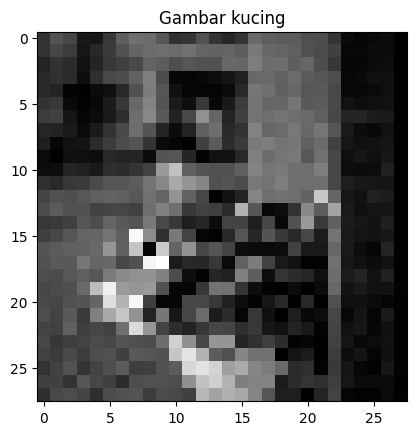

In [7]:
import cv2
import numpy as np

# gambar kucing
image_path = '/content/kucing-tabby.jpeg'

# Load gambar kucing
image = cv2.imread(image_path)

# Resize gambar 28x28 pixels
resized_image = cv2.resize(image, (28, 28))

# Convert gambar ke grayscale
grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Visualisasi gambar input
plt.imshow(grayscale_image, cmap='gray')
plt.title("Gambar kucing")
plt.show()

In [8]:
# Bangun model CNN sederhana
model = models.Sequential()

# Convolutional Layer pertama dengan stride dan padding
model.add(layers.Conv2D(16, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(30, 2, 1)))

# Pooling Layer (3x3)
model.add(layers.MaxPooling2D((3, 3)))

# Convolutional Layer kedua
model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))

# Pooling Layer (2x2)
model.add(layers.MaxPooling2D((2, 2)))

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 0, 16)           │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 0, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 9, 0, 128)           │          18,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 0, 128)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,720 (73.12 KB)

 Trainable params: 18,720 (73.12 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Flatten output untuk fully connected layer
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer dengan 1 unit (untuk klasifikasi 1 kelas) dengan sigmoid
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
(train_images, train_labels), (test_images, test_labels) = grayscale_image

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

ValueError: too many values to unpack (expected 2)

## Nomor 3
Dengan langkah-langkah yang ada pada D.2 gunakan data fashion_mnist dari tensorflow sebagai dataset. Kemudian bangun model yang terdiri dari empat convolutional layers dan tiga pooling layers. Berikan parameter stride, padding, ukuran karnel, dan fungsi aktivasi yang anda perlukan. Tampilkan hasil evaluasi akurasi dan validasi akurasi !  


In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import cv2

# Muat dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Normalisasi data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data untuk CNN
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


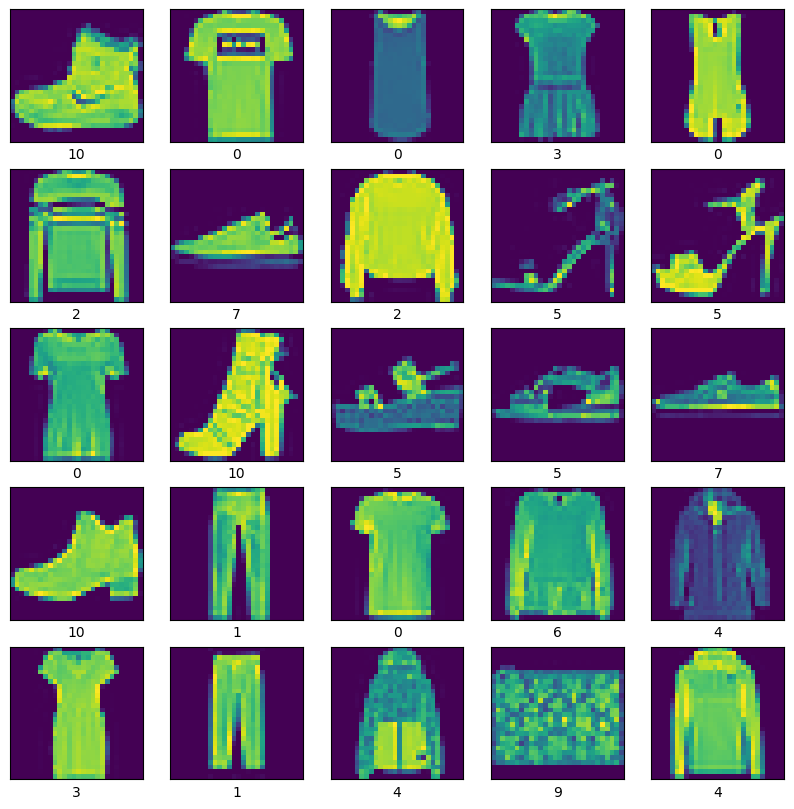

In [22]:
# Muat dataset Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '9', '10']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
# Bangun model CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), strides=(1, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',strides=(1, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',strides=(1, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu',strides=(1, 1), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


hanya menggunakan epochs = 3 untuk meringankan beban komputasi

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7870 - loss: 1.1369 - val_accuracy: 0.8840 - val_loss: 0.3212
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8907 - loss: 0.2975 - val_accuracy: 0.8793 - val_loss: 0.3380
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9076 - loss: 0.2554 - val_accuracy: 0.8858 - val_loss: 0.3320
313/313 - 0s - 2ms/step - accuracy: 0.8858 - loss: 0.3320

Test accuracy: 0.8858000040054321


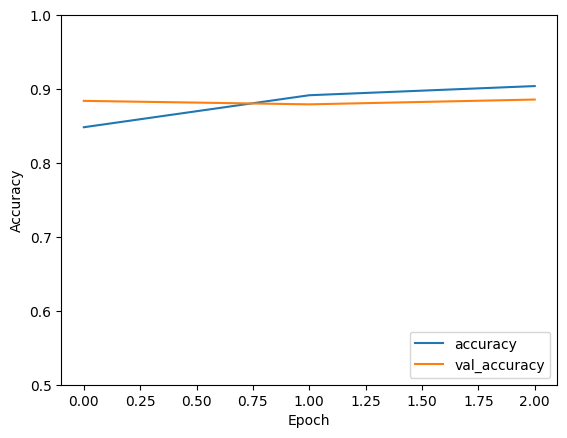

In [17]:
# Latih model
history = model.fit(x_train, y_train, epochs=3,
                    validation_data=(x_test, y_test))

# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot akurasi dan validasi akurasi
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()